In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

In [3]:
train_data = pd.read_csv('/content/drive/MyDrive/BE Practicals/Practice Codes/stock_train.csv')
train_data.head()

,Date,Open,High,Low,Close,Volume
0,01/03/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,01/04/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,01/05/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,01/06/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,01/09/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
train_array = train_data.iloc[:, 1:2].values
train_array[:5]

array([[325.25],
       [331.27],
       [329.83],
       [328.34],
       [322.04]])

In [5]:
train_array.shape

(1509, 1)

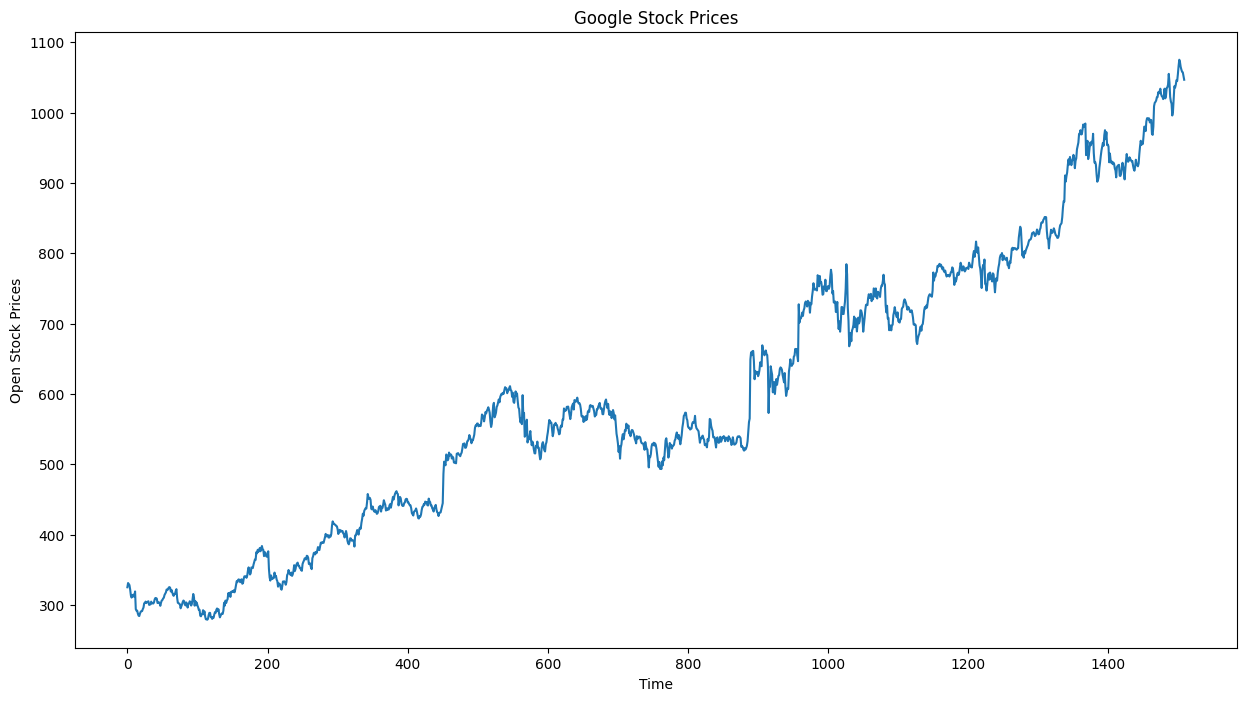

In [6]:
plt.figure(figsize = (15, 8))
plt.plot(train_data['Open'])
plt.xlabel('Time')
plt.ylabel('Open Stock Prices')
plt.title('Google Stock Prices')
plt.show()

In [7]:
scaler = MinMaxScaler(feature_range = (0, 1))
scaled_train_array = scaler.fit_transform(train_array)
scaled_train_array[:5]

array([[0.05794644],
       [0.0655085 ],
       [0.06369963],
       [0.06182796],
       [0.05391418]])

In [8]:
X_train = []
y_train = []
for i in range(60, len(scaled_train_array)):
  X_train.append(scaled_train_array[i-60:i, 0])
  y_train.append(scaled_train_array[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
X_train.shape

(1449, 60)

In [10]:
y_train.shape

(1449,)

In [11]:
X_train = np.reshape(X_train, newshape = (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1449, 60, 1)

In [12]:
model = Sequential()

model.add(LSTM(50, input_shape = (X_train.shape[1], 1), return_sequences = True))
model.add(Dropout(rate = 0.2))

model.add(LSTM(50, return_sequences = True))
model.add(Dropout(rate = 0.2))

model.add(LSTM(50, return_sequences = True))
model.add(Dropout(rate = 0.2))

model.add(LSTM(50, return_sequences = False))
model.add(Dropout(rate = 0.2))

model.add(Dense(1, activation = 'linear'))

model.compile(optimizer = 'adam', loss = 'mae', metrics = ['mse'])

In [13]:
history = model.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
46/46 [==============================] - 14s 16ms/step - loss: 0.1047 - mse: 0.0256
Epoch 2/50
46/46 [==============================] - 1s 13ms/step - loss: 0.0437 - mse: 0.0037
Epoch 3/50
46/46 [==============================] - 1s 13ms/step - loss: 0.0436 - mse: 0.0038
Epoch 4/50
46/46 [==============================] - 1s 13ms/step - loss: 0.0421 - mse: 0.0032
Epoch 5/50
46/46 [==============================] - 1s 14ms/step - loss: 0.0412 - mse: 0.0033
Epoch 6/50
46/46 [==============================] - 1s 16ms/step - loss: 0.0376 - mse: 0.0028
Epoch 7/50
46/46 [==============================] - 1s 19ms/step - loss: 0.0367 - mse: 0.0026
Epoch 8/50
46/46 [==============================] - 1s 18ms/step - loss: 0.0413 - mse: 0.0033
Epoch 9/50
46/46 [==============================] - 1s 19ms/step - loss: 0.0366 - mse: 0.0026
Epoch 10/50
46/46 [==============================] - 1s 18ms/step - loss: 0.0345 - mse: 0.0023
Epoch 11/50
46/46 [==============================] - 1s 13

In [14]:
test_data = pd.read_csv('/content/drive/MyDrive/BE Practicals/Practice Codes/stock_test.csv')
test_data.head()

,Date,Open,High,Low,Close,Volume
0,02/01/2018,1048.339966,1066.939941,1045.229980,1065.000000,1237600
1,03/01/2018,1064.310059,1086.290039,1063.209961,1082.479980,1430200
2,04/01/2018,1088.000000,1093.569946,1084.001953,1086.400024,1004600
3,05/01/2018,1094.000000,1104.250000,1092.000000,1102.229980,1279100
4,08/01/2018,1102.229980,1111.270020,1101.619995,1106.939941,1047600


In [15]:
test_array = test_data.iloc[:, 1:2].values
test_array[:5]

array([[1048.339966],
       [1064.310059],
       [1088.      ],
       [1094.      ],
       [1102.22998 ]])

In [17]:
total_data = pd.concat((train_data['Open'], test_data['Open']), axis = 0)
test_inputs = total_data[len(total_data) - len(test_data) - 60:].values

In [19]:
test_inputs = test_inputs.reshape(-1, 1)
test_inputs = scaler.fit_transform(test_inputs)

In [20]:
X_test = []
for i in range(60, len(test_inputs)):
  X_test.append(test_inputs[i-60:i, 0])
X_test = np.array(X_test)

In [22]:
X_test = np.reshape(X_test, newshape = (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(125, 60, 1)

In [23]:
pred_stock_price = model.predict(X_test)

4/4 [==============================] - 1s 9ms/step


In [24]:
pred_stock_price[:5]

array([[0.46491307],
       [0.44972152],
       [0.44276017],
       [0.45441872],
       [0.48553026]], dtype=float32)

In [25]:
pred_stock_price = scaler.inverse_transform(pred_stock_price)
pred_stock_price[:5]

array([[1058.6263],
       [1055.2562],
       [1053.7119],
       [1056.2982],
       [1063.2   ]], dtype=float32)

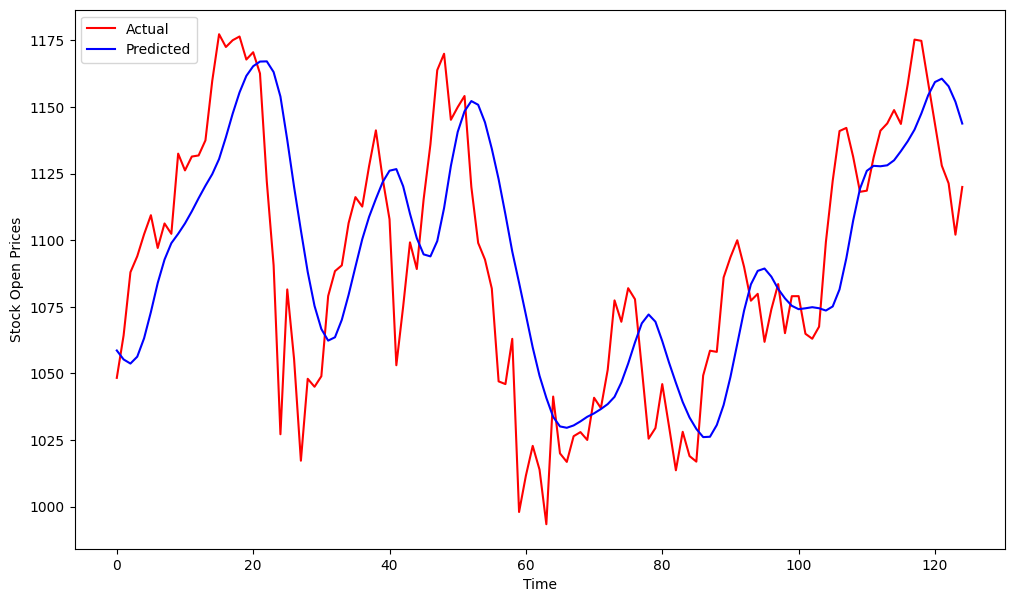

In [29]:
plt.figure(figsize = (12, 7))
plt.plot(test_data['Open'], color = 'red')
plt.plot(pred_stock_price, color = 'blue')
plt.xlabel('Time')
plt.ylabel('Stock Open Prices')
plt.legend(['Actual', 'Predicted'])
plt.show()